# Feeling Bitcoin


##  Vader Model

### Preparing Data and Model


In [1]:
import spacy
import en_core_web_sm
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from collections import Counter


In [2]:
# TODO: Use NLTK's download method to download the vader lexicon
nltk.download("vader_lexicon")
# TODO: Instantiate the SentimentIntensityAnalyzer into a variable analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yasmin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df = pd.read_csv("tweets.csv")
# TODO: Preview the df using .head()
df.head()

,Unnamed: 0.1,Unnamed: 0,id,timestamp,user,replies,likes,retweets,text
0,105027,5625766,9.393023e+17,2017-12-09 00:14:51+00,BitcoinPoll,0.0,0.0,0.0,$LTC to doubled its value soon? #Litecoins #bi...
1,36386,2251044,8.857079e+17,2017-07-14 01:49:54+00,aimanstronk_,0.0,0.0,0.0,Tukar ke bitcoin. Lpstu tukar bitcoin ke RM. s...
2,141547,3797663,9.607030e+17,2018-02-06 01:33:36+00,WBlizters,0.0,1.0,0.0,I got 3 bitcoin for my pancreas
3,52671,4354916,9.172289e+17,2017-10-09 01:22:54+00,JAIROGLYPHIC_JR,0.0,0.0,0.0,@GenesisMining when will there be more btc min...
4,61020,4250362,9.176055e+17,2017-10-10 02:19:46+00,sskknn00,0.0,0.0,0.0,"yep they are not calling btc-core BTC, how dar..."


### Calculating Polarity


In [4]:
sample_text = df.iloc[0]["text"]
analyzer.polarity_scores(sample_text)

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}

In [5]:
text_data = df["text"].astype("str")
# TODO: calculate polarity scores for all rows of the `text` column using .apply() and store in a new variable called "raw_scores".
raw_scores = text_data.apply(analyzer.polarity_scores)
scores_df = pd.DataFrame(list(raw_scores))
scores_df.head()

,neg,neu,pos,compound
0,0.000,0.769,0.231,0.3400
1,0.000,0.888,0.112,0.2263
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.432,0.480,0.088,-0.8622


In [6]:
# TODO: create a new column `"compound_sentiment"` on the `df` dataframe from the `scores_df`'s column for `"compound"`
df["compound_sentiment"] = scores_df["compound"]

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,timestamp,user,replies,likes,retweets,text,compound_sentiment
0,105027,5625766,9.393023e+17,2017-12-09 00:14:51+00,BitcoinPoll,0.0,0.0,0.0,$LTC to doubled its value soon? #Litecoins #bi...,0.3400
1,36386,2251044,8.857079e+17,2017-07-14 01:49:54+00,aimanstronk_,0.0,0.0,0.0,Tukar ke bitcoin. Lpstu tukar bitcoin ke RM. s...,0.2263
2,141547,3797663,9.607030e+17,2018-02-06 01:33:36+00,WBlizters,0.0,1.0,0.0,I got 3 bitcoin for my pancreas,0.0000
3,52671,4354916,9.172289e+17,2017-10-09 01:22:54+00,JAIROGLYPHIC_JR,0.0,0.0,0.0,@GenesisMining when will there be more btc min...,0.0000
4,61020,4250362,9.176055e+17,2017-10-10 02:19:46+00,sskknn00,0.0,0.0,0.0,"yep they are not calling btc-core BTC, how dar...",-0.8622


### Analyze Sentiment


<AxesSubplot:ylabel='Density'>

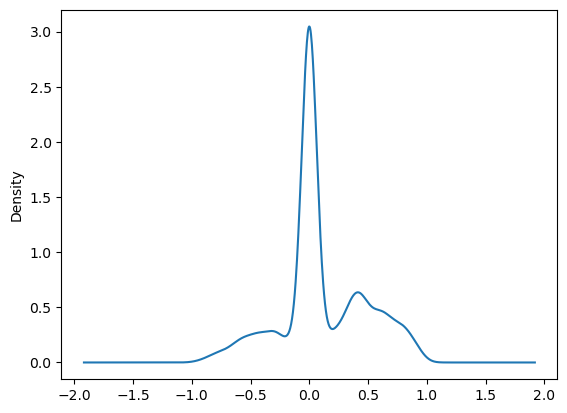

In [8]:
# TODO: create a density plot of compound sentiment column
df["compound_sentiment"].plot(kind="density")


> Detectable lean towards a more positive sentiment. 

In [9]:
# TODO: .count() rows with compound_sentiment above 0.5
df[df["compound_sentiment"] > 0.5].count()

Unnamed: 0.1          1005
Unnamed: 0            1005
id                    1005
timestamp             1005
user                  1005
replies               1005
likes                 1005
retweets              1005
text                  1005
compound_sentiment    1005
dtype: int64

In [10]:
# TODO: .count() rows with compound_sentiment below -0.5
df[df["compound_sentiment"] < -0.5].count()

Unnamed: 0.1          350
Unnamed: 0            350
id                    350
timestamp             350
user                  350
replies               350
likes                 350
retweets              350
text                  350
compound_sentiment    350
dtype: int64

> Significantly greater number of tweets are positive. 

> Generally mixed distribution with a clear lean towards positive sentiment.


##  Spacy Word Dependency Analysis

### Spacy Model Setup


In [11]:
# TODO: Instantiate a spacy model with .load() and use "en_core_web_sm"
spacy_model = spacy.load("en_core_web_sm")

In [12]:
# TODO: Create a list of the ways "bitcoin" may be represented in text, and store in a variable bitcoin_words.
bitcoin_words = ["btc", "BTC", "bitcoin", "bitcoins", "Bitcoin", "crypto", "cryptocurrency", "token", "eth", "blockchain", "coin"]

In [13]:
def bitcoin_adjectives(corpus, target_words, expressive):
      
    results = []
    
    for doc in corpus:
        for token in spacy_model(doc):
        
            if(expressive):
                print(token.text)
                print(token.pos_)
                print(token.head.text)
                print("")

            if token.pos_ == "ADJ" and token.head.text in target_words:
                results.append(token.text)
                
    return results

### Using our Function


In [14]:
test_text = ["The investors leaped for joy at their enormously profitable bitcoin."]

In [15]:
# TODO: Pass the necessary variables into the bitcoin_adjectives function to test and display your results. 
bitcoin_adjectives(test_text, bitcoin_words, True)

The
DET
investors

investors
NOUN
leaped

leaped
VERB
leaped

for
ADP
leaped

joy
NOUN
for

at
ADP
leaped

their
PRON
bitcoin

enormously
ADV
profitable

profitable
ADJ
bitcoin

bitcoin
NOUN
at

.
PUNCT
leaped



['profitable']

### Spacy model scale-up



In [ ]:
text_data = df.text

adjectives = bitcoin_adjectives(text_data, bitcoin_words, False)

adjectives

In [ ]:
# TODO: Extract the lowercase text of the token for each token in the adjectives list into a new variable `adjective_extract`
adjective_extract = [token.lower() for token in adjectives]

# TODO: Instantiate a new Counter() using `adjective_extract`, and store into a variable `counter`
counter = Counter(adjective_extract)

# TODO: Use counter's .most_common() method to view the top 100 most frequently used modifiers of the noun bitcoin
counter.most_common(100)